In [4]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# a. Demonstrating the stability

I spent some time thinking about the possibility to construct a ring of evenly spaced stars with the planet in the middle, but this configuration was unstable. Then I found this article: https://planetplanet.net/2018/03/21/asimov-kalgash-take2/ 
Here author proves that the exact system is not possible. But he provides some alternatives, and I want to test this particular scheme:

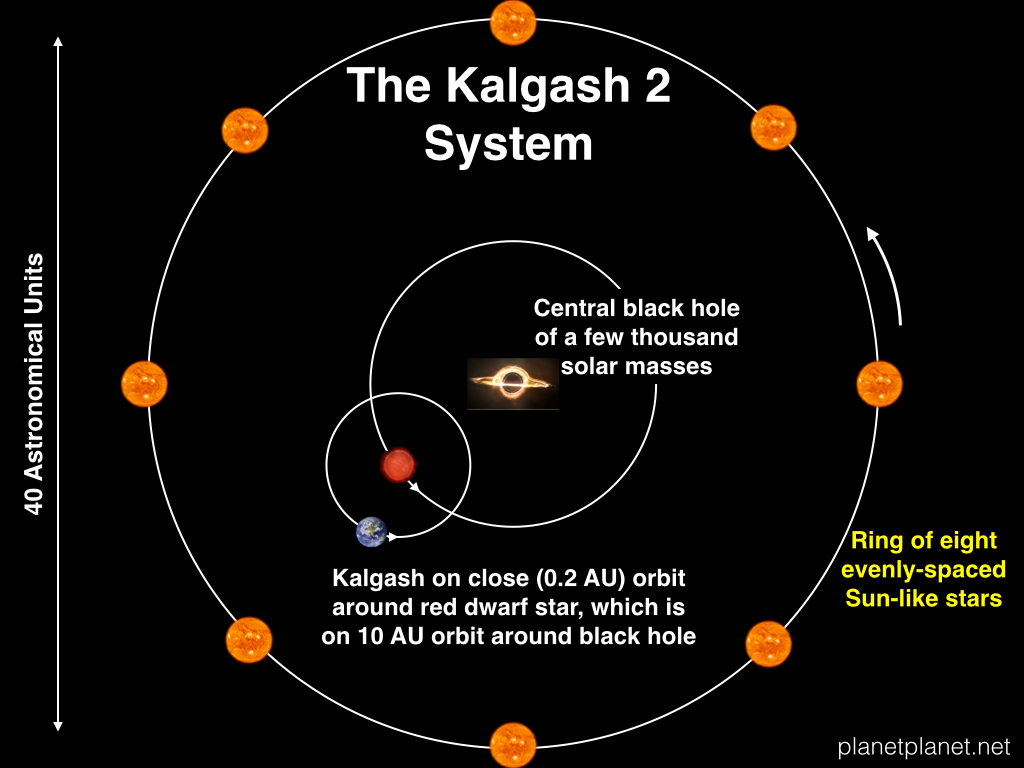

In [1]:
from PIL import Image
from IPython.display import display

import urllib.request
from io import BytesIO 

url = 'https://planetplanet.net/wp-content/uploads/2018/03/kalgash-0131.jpg'
with urllib.request.urlopen(url) as url:
    img = Image.open(BytesIO(url.read()))

display(img)


For simplicity, I removed red dwarf and made Lagash's orbit a bit closer to the stars. I made a stars itself a little bigger, with the masses of 2 solar masses. I also made the number of stars in the outside ring equal to 6

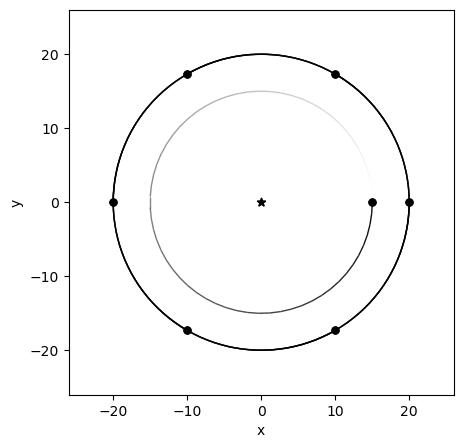

In [67]:
sim = rebound.Simulation()

sim.units = ('AU', 'yr', 'Msun')

bh_mass = 30000
sim.add(m=bh_mass) # Central BH

sim.add(m=3e-6, a=15, e=0) # Lagash (mass = Earth's mass)

n_stars = 6
a_stars = 20
for i in range(n_stars):
    theta = 2 * np.pi * i / n_stars  # Evenly spaced angle
    x = a_stars * np.cos(theta)
    y = a_stars * np.sin(theta)
    vx = -np.sin(theta) * np.sqrt(sim.G * bh_mass / a_stars)
    vy = np.cos(theta) * np.sqrt(sim.G * bh_mass / a_stars)
    sim.add(m=2, x=x, y=y, vx=vx, vy=vy)  # Betelgeuse-like stars, evenly spaced in the outside ring
    
rebound.OrbitPlot(sim)

Integrating this system for 10000 years:

100%|██████████| 100/100 [00:14<00:00,  7.09it/s]


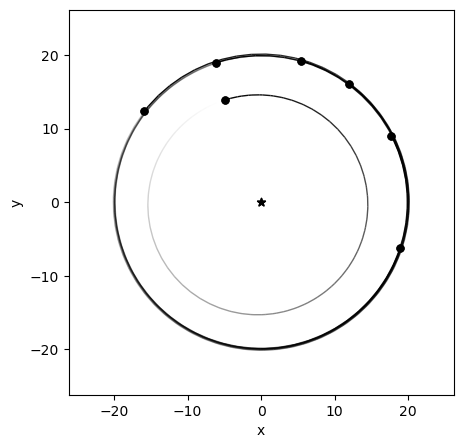

In [68]:
times = np.arange(0, 1e4, 100)

for t in tqdm(times):
    sim.integrate(t)
    
rebound.OrbitPlot(sim)

We can see that the system is unstable, stars are 

According to the article, such ring should be stable only with >7 stars, so let's try 7 stars:

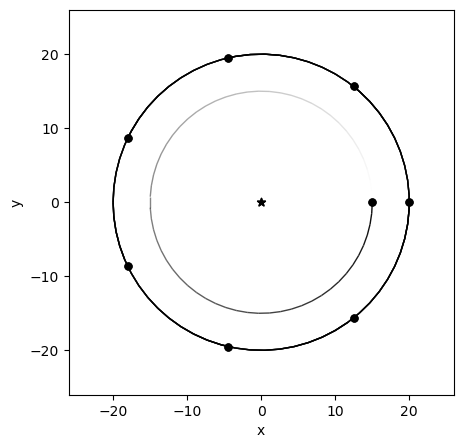

In [69]:
sim = rebound.Simulation()

sim.units = ('AU', 'yr', 'Msun')

bh_mass = 30000
sim.add(m=bh_mass) # Central BH

sim.add(m=3e-6, a=15, e=0) # Lagash (mass = Earth's mass)

n_stars = 7
a_stars = 20
for i in range(n_stars):
    theta = 2 * np.pi * i / n_stars  # Evenly spaced angle
    x = a_stars * np.cos(theta)
    y = a_stars * np.sin(theta)
    vx = -np.sin(theta) * np.sqrt(sim.G * bh_mass / a_stars)
    vy = np.cos(theta) * np.sqrt(sim.G * bh_mass / a_stars)
    sim.add(m=2, x=x, y=y, vx=vx, vy=vy)  # Betelgeuse-like stars, evenly spaced in the outside ring
    
rebound.OrbitPlot(sim)


100%|██████████| 100/100 [00:16<00:00,  6.14it/s]


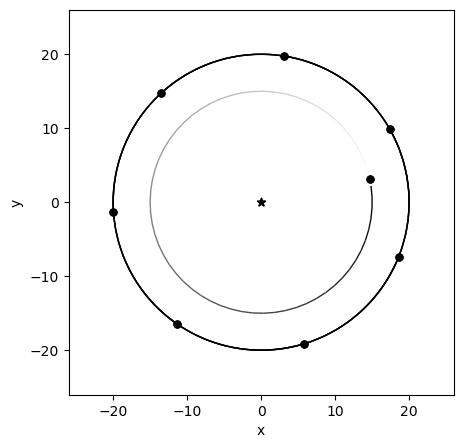

In [70]:
times = np.arange(0, 1e4, 100)

for t in tqdm(times):
    sim.integrate(t)
    
rebound.OrbitPlot(sim)

Okay, system seems to be stable! Now let's simulate for 1mln years

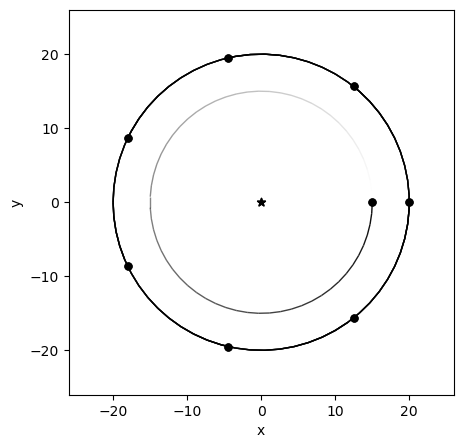

In [71]:
sim = rebound.Simulation()

sim.units = ('AU', 'yr', 'Msun')

bh_mass = 30000
sim.add(m=bh_mass) # Central BH

sim.add(m=3e-6, a=15, e=0) # Lagash (mass = Earth's mass)

n_stars = 7
a_stars = 20
for i in range(n_stars):
    theta = 2 * np.pi * i / n_stars  # Evenly spaced angle
    x = a_stars * np.cos(theta)
    y = a_stars * np.sin(theta)
    vx = -np.sin(theta) * np.sqrt(sim.G * bh_mass / a_stars)
    vy = np.cos(theta) * np.sqrt(sim.G * bh_mass / a_stars)
    sim.add(m=2, x=x, y=y, vx=vx, vy=vy)  # Betelgeuse-like stars, evenly spaced in the outside ring
    
rebound.OrbitPlot(sim)

100%|██████████| 1000/1000 [27:24<00:00,  1.64s/it]


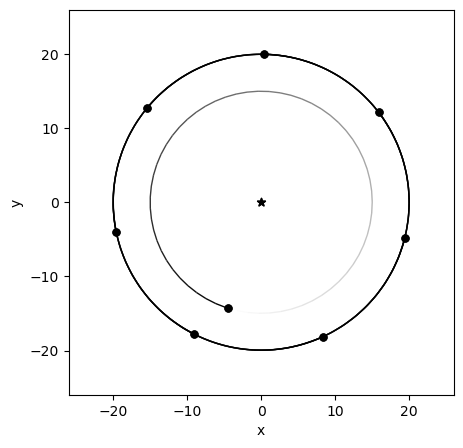

In [72]:
times = np.arange(0, 1e6, 1000)

for t in tqdm(times):
    sim.integrate(t)

rebound.OrbitPlot(sim)

System is stable! So, by adding 1 star to the ring, and intermediate-mass black hole (30k solar masses) in the middle, we are able to create scenario where every part of the planet is always lit up.

Strictly speaking, we are not sure yet that black holes with such masses exist, but let's assume that they do, for the sake of this simulation :)

Detailed description of the system:

Intermediate-mass black hole in the center of the system (with M = 30000 solar masses)

Planet Lagash orbiting it in the circular orbit at 15 AU

Ring of 7 evenly spaced stars, with M = 2 solar masses, radius of the ring is 20 AU

# b. Possibility of human life

I think it is actually pretty clear that humans cannot live on such planet :)


Lagash is too close to the black hole, if the black hole has an accretion disk then the planet could suffer from the harmful radiation from it. Moreover, it is highly likely that the planet will be tidally locked to the black hole, so one side of it will always receive significantly less radiation from the stars than the other side. This is obviously not good for any life, since one side will be extremely hot, and the other extremely cold. 

# c. Lagash 2

I don't think such moon could exist in my simulation. 

It is simply impossible to put a moon with the period of 2049 years near Lagash. If we are talking about circular orbit, this moon will have to be on the orbit around Lagash with the radius $r = \left(\dfrac{GM_{Lagash}T^2}{4 \pi^2}\right)^{1/3} \approx 0.28$ AU. This is far beyond the area where the gravitational influence of Lagash would be dominant.  

Any king of elliptical orbit will have an apocenter even farther, so Lagash 2 would not be gravitationally bound to Lagash, therefore, system would not be stable.

I didn't quite understand how to do part d. if Lagash 2 is not possible in my configuration, so I will skip it. 